### Exploratory Data Analysis (EDA) & Problem Formulation

##### __GOAL__
The main task is to use historical data about a customer, which is collected month-by-month (like their spending habits, payment patterns, credit card balances, etc.) to estimate the likelihood that they will fail to repay what they owe on their credit card in the future.

Here, the _"target binary variable"_ is what participants of the competition are trying to predict. It's binary because it has two possible values:
* "default" (customer didn't pay), or
* "no default" (customer paid).

The way this target is determined is by watching the customer's behavior for 18 months after their most recent credit card statement. If, during those 18 months of observation, the customer fails to make a payment within 120 days (4 months) from the date of their last statement, they are marked as having defaulted on their credit card balance. So, even if they make a payment on the 121st day or anytime after, for the purposes of this competition, they're categorized as having defaulted.

##### __Analysis of Credit Card Statements per Customer__
1. A significant majority, precisely 80%, of our customers have 13 statements.
2. The remaining 20% possess a varied number of statements, ranging from 1 to 12.

__Insight__: The model cannot handle this variation in statement counts because it cannot handle different input sizes for each customer. An alternative approach to address this variability might be to consider only the latest statement or compute an average across all statements for each customer. Some machine learning models can indeed handle variable input sizes (like recurrent neural networks for sequences), while others require fixed-size inputs.

In [1]:
import pandas as pd
import numpy as np
from typing import Tuple, List

import seaborn as sns

import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly.colors import n_colors
import matplotlib.patches as mpatches

In [2]:
train = pd.read_feather('C:/There/Stuff/Preset/train_data.ftr')
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [3]:
train

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979492,0.416016,0.020813,0.828125,0.003487,0.090759,0.005341,0.025146,...,NaN,NaN,0.006836,0.003679,0.000457,NaN,0.000906,0.001497,0.002775,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984863,0.296631,0.007210,0.812500,0.005905,0.079895,0.002243,0.023697,...,NaN,NaN,0.003309,0.007095,0.007858,NaN,0.002777,0.008224,0.008858,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.982910,0.444092,0.013153,0.815430,0.003456,0.100525,0.002111,0.012344,...,NaN,NaN,0.009956,0.009995,0.001088,NaN,0.005692,0.006775,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969727,0.442627,0.009857,1.003906,0.005116,0.101807,0.009933,0.008575,...,NaN,NaN,0.005543,0.006565,0.009880,NaN,0.008125,0.001168,0.003983,0


In [4]:
# Menghitung jumlah pelanggan unik
nbr_customers = train["customer_ID"].nunique()

# Menghitung frekuensi kemunculan customer_ID dan mengelompokkannya berdasarkan jumlah pernyataan
statements_count = train["customer_ID"].value_counts().reset_index()
statements_count.columns = ["customer_ID", "Nbr of Statements per customer"]

# Menghitung jumlah pelanggan untuk setiap jumlah pernyataan
statements_df = statements_count["Nbr of Statements per customer"].value_counts().sort_index(ascending=False).reset_index()
statements_df.columns = ["Nbr of Statements per customer", "Nbr of customers"]

# Menghitung persentase pelanggan
statements_df["% of customers"] = np.round((statements_df["Nbr of customers"] / nbr_customers) * 100, 2)

# Menyajikan output dalam format yang diinginkan
statements_df = statements_df.sort_values(by="Nbr of Statements per customer", ascending=False)
statements_df.reset_index(drop=True, inplace=True)

# Menampilkan output dengan style background gradient
statements_df.style.background_gradient(axis=0, cmap='YlOrRd', subset=["Nbr of customers", "% of customers"])

,Nbr of Statements per customer,Nbr of customers,% of customers
0,13,386034,84.120000
1,12,10623,2.310000
2,11,5961,1.300000
3,10,6721,1.460000
4,9,6411,1.400000
5,8,6110,1.330000
6,7,5198,1.130000
7,6,5515,1.200000
8,5,4671,1.020000
9,4,4673,1.020000


In [5]:
"""
Returns a Series giving the count of null values in each column of the DataFrame.
It's a handy way to quickly check if your data has any missing values and how many there are in each column.
"""

missing_values = train.isnull().sum()

"""
# It converts the Series to a DataFrame using .to_frame().
# Then, it resets the index of the DataFrame so that the original index (which was the column names from the DataFrame) becomes a column in the DataFrame, and a new numerical index is created using .reset_index().
# Finally, it sorts the DataFrame by the "Number of null values" column in descending order (so the column with the most missing values will be at the top)
"""

missing_values_df = missing_values.to_frame().reset_index().rename(
    columns={
        'index':'Feature',
        0:'Number of Missing Values'
}).sort_values(by=['Number of Missing Values'], ascending=False).reset_index(drop=True)
missing_values_df['% Missing Values'] = np.round((missing_values_df['Number of Missing Values'] / train.shape[0]) *100,2)

In [6]:
print(f"{missing_values_df[ missing_values_df['% Missing Values'] > 89].shape[0]} out of {missing_values_df.shape[0]},")
print(f"({np.round((missing_values_df[missing_values_df['% Missing Values'] > 89].shape[0] / missing_values_df.shape[0]) * 100, 2)}%), features in the dataset have missing values in more than 89% of their rows")

18 out of 191,
(9.42%), features in the dataset have missing values in more than 89% of their rows


__Insights:__
* There are many columns with missing values: Dropping all columns which have missing values is not a sensible strategy.
* There are many rows with missing values: Dropping all rows which have missing values is not a sensible strategy.
* Many decision-tree based algorithms can deal with missing values. If we choose such a model, we don't need to change the missing values. Neural networks and other estimators cannot deal with missing values. If we choose such a model, we need to impute values.

In [7]:
train = train.groupby(['customer_ID']).tail(1).set_index('customer_ID')

In [8]:
plot_df = train.reset_index().groupby('S_2')['customer_ID'].nunique().reset_index()
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=plot_df['S_2'],
        y=plot_df['customer_ID'],
        mode='markers+lines',
        line=dict(color='red', width=3),
        hovertemplate=''
    )
)

large_title_format = "<span style='font-size:24; font-family:Times New Roman'>Frequency of Customer Statements</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

fig.update_layout(
    title=large_title_format + "<br>" + small_title_format,
    hovermode='x unified',
    width=800,
    height=500,
    xaxis_title='Statement Date',
    yaxis_title='Number of Statements Issued',
    font=dict(color='#7b6b59'),
    plot_bgcolor='#fff')

fig.show()

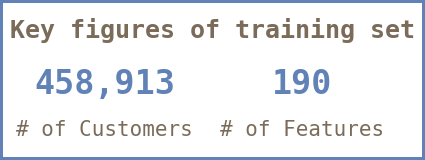

In [9]:
plt.rcParams.update(plt.rcParamsDefault)

fig1 = plt.figure(figsize=(2,2), facecolor='white')

ax1 = fig1.add_subplot(1,1,1)
ax1.text(
    x=0.6, 
    y=0.8, 
    s='Key figures of training set', 
    color='#7B6B59', 
    fontsize=18, 
    fontweight='bold', 
    fontfamily='monospace', 
    ha='center')

ax1.text(
    x=0,
    y=0.4,
    s="{:,d}".format(train.shape[0]),
    color='#6082B6',
    fontsize=24,
    fontweight='bold',
    fontfamily='monospace',
    ha='center'
)
ax1.text(
    x=0,
    y=0.100,
    s="# of Customers",
    color='#7B6B59',
    fontsize=15,
    fontweight='light',
    fontfamily='monospace',
    ha='center'
)

ax1.text(
    x=1.1,
    y=0.4,
    s="{}".format(train.shape[1]),
    color='#6082B6',
    fontsize=24,
    fontweight='bold',
    fontfamily='monospace',
    ha='center'
)
ax1.text(
    x=1.1,
    y=0.100,
    s="# of Features",
    color='#7B6B59',
    fontsize=15,
    fontweight='light',
    fontfamily='monospace',
    ha='center'
)

ax1.set_yticklabels('')
ax1.tick_params(axis='y', length=0)
ax1.tick_params(axis='x', length=0)
ax1.set_xticklabels('')

for direction in ['top', 'right', 'left', 'bottom']:
    ax1.spines[direction].set_visible(False)

fig1.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig1.patch.set_linewidth(3)
fig1.patch.set_edgecolor('#6082B6')
fig1.patch.set_facecolor('white')
ax1.set_facecolor('white')

plt.show()
plt.close()

In [10]:
delinquency_features = [c for c in train.columns if c.startswith('D_')]
spend_features = [c for c in train.columns if c.startswith('S_')]
payment_features = [c for c in train.columns if c.startswith('P_')]
balance_features = [c for c in train.columns if c.startswith('B_')]
risk_features = [c for c in train.columns if c.startswith('R_')]

print(f'Total Number of Deliquency Variables: {len(delinquency_features)}')
print(f'Total Number of Spend Variables: {len(spend_features)}')
print(f'Total Number of Payment Variables: {len(payment_features)}')
print(f'Total Number of Balance Variables: {len(balance_features)}')
print(f'Total Number of Risk Variables: {len(risk_features)}')

Total Number of Deliquency Variables: 96
Total Number of Spend Variables: 22
Total Number of Payment Variables: 3
Total Number of Balance Variables: 40
Total Number of Risk Variables: 28


In [11]:
labels =['Delinquency', 'Spend', 'Payment', 'Balance', 'Risk']
values = [len(delinquency_features), len(spend_features), len(payment_features), len(balance_features), len(risk_features)]

# First Plot
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=.4
)])

fig.update_traces(
    marker=dict(colors=['#a43725', '#e0d5bd', '#beb29e', '#E6b6a4', '#c07156'])
)

large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Feature Distribution</span>"
small_title_format = "<b><span style='font-size:14px; font-family:Helvetica'></b></span>"

layout = dict(
    title = large_title_format + small_title_format,
    font =dict(color = '#7B6B59'),
    showlegend = True,
    margin = dict(t=80, pad=0),
)
fig['layout'].update(layout)

fig.show()

In [12]:
titles =['Delinquency ' + str(i).split('_')[1] if i.startswith('D') else 'Spend ' + str(i).split('_')[1]
         if i.startswith('S') else 'Payment ' + str(i).split('_')[1]
         if i.startswith('P') else 'Balance ' + str(i).split('_')[1]
         if i.startswith('B') else 'Risk ' + str(i).split('_')[1] for i in train.columns[:-1]]

cat_cols =['Balance 30', 'Balance 38', 'Delinquency 63', 'Delinquency 64', 'Delinquency 66', 'Delinquency 68',
          'Delinquency 114', 'Delinquency 116', 'Delinquency 117', 'Delinquency 120', 'Delinquency 126', 'Target']

titles.append('Target')
train.columns=titles

### __Target Variable Analysis__
* Plot the distribution of the target variable (pie chart or bar chart since it's binary).
* Calculate the base rate (i.e., what percentage of clients default).

In [13]:
# Count occurences of each target value
target_counts = train['Target'].value_counts()
total_counts = len(train)

# Calculate percentages
percentages = (target_counts / total_counts * 100).round(2)

# Create the bar plot
fig =go.Figure()

# Add bar plot for target distribution
# Customizing the legend entries using the 'name' attr
fig.add_trace(go.Bar(
    x=['0'],
    y=[target_counts[0]],
    text=f'{percentages[0]}%',
    textposition='auto',
    marker_color='red',
    name='Non-Default / Paid'
))

fig.add_trace(go.Bar(
    x=['1'],
    y=[target_counts[1]],
    text=f'{percentages[1]}%',
    textposition='auto',
    marker_color='lightgrey',
    name='Default'
))

large_title_format = "<span style = 'font-size:30px; font-family:Times New Roman'> Target Distribution</span>"
small_title_format = "<b><span style = 'font-size:14px; font-family:Helvetica'></b></span>"

layout = dict(
    title = large_title_format + small_title_format,
    font = dict(color = '#7B6B59'),
    xaxis = dict(showticklabels =False),
    margin = dict(t=80, pad=0),
    plot_bgcolor = '#fff'
)
fig['layout'].update(layout)

fig.show()

We start by reading the labels for the training data. There are neither missing values nor duplicated customer_IDs. Of the 458913 customer_IDs, 74 % have a label of 0 (good customer, no default) and 26 % have a label of 1 (bad customer, default).

We know that the good customers have been subsampled by a factor of 20; this means that in reality there are 6.8 million good customers. 98 % of the customers are good; 2 % are bad.

__Insight:__

__The classes are imbalanced__. A StratifiedKFold for cross-validation is recommended. Because the classes are imbalanced, accuracy would be a bad metric to evaluate a classifier. The competition metric is a mix of area under the roc curve (auc) and recall.

In [14]:
# This code visualizes the distribution of cat_cols (which presumably represents categorical columns) with respect to the target variable (Target).
# Each category value is shown in subplots, and for each category value, two bars are displayed: 
# one for target 1 (Default) and another for target 0 (Paid). The colors and styles are also customized.
pal, color=['#C8102E', '#C0C0C0'], ['#F2F0EB', '#C0C0C0']
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

# Creates a subplot grid with 4 rows and 3 columns. 
# The titles of the subplots are taken from the variable cat_cols, excluding its last element. 
fig = make_subplots(
    rows=4, 
    cols=3, 
    subplot_titles=cat_cols[:-1], 
    vertical_spacing=0.1
)

row=0
c=[1,2,3]*5
plot_df=train[cat_cols]
# Loop to Add Bars to Subplots
# This loop runs through each column in cat_cols (excluding the last one) 
for i,col in enumerate(cat_cols[:-1]):
    
    if i%3==0:
        row+=1
    
    plot_df[col]=plot_df[col].astype(object).fillna("N/A")
    
    df=plot_df.groupby(col)['Target'].value_counts(dropna=False).rename('count').reset_index()
    
    all_categories = df[col].unique()
    
    # Getting values for Target=1
    df_target_1 = df[df.Target == 1].set_index(col)['count'].reindex(all_categories).fillna(0).reset_index()
    df_target_1[col]=df_target_1[col].values.astype(str)

    
    # Getting values for Target=0
    df_target_0 = df[df.Target == 0].set_index(col)['count'].reindex(all_categories).fillna(0).reset_index()
    df_target_0[col]=df_target_0[col].values.astype(str)

    
    # Adds a bar for the target 1 (Default) and another for target 0 (Paid) to the subplots.
    fig.add_trace(
        go.Bar(
            x=df_target_1[col],
            y=df_target_1['count'],
            marker_color=rgb[1], 
            marker_line=dict(color=pal[1],width=2), 
            hovertemplate='Value %{x} Frequency = %{y}',
            name='Default', 
            showlegend=(True if i==0 else False)
        ),
        row=row, 
        col=c[i]
    )
    
    fig.add_trace(
        go.Bar(
            x=df_target_0[col], 
            y=df_target_0['count'],
            marker_color=rgb[0],
            marker_line=dict(color=pal[0],width=2),
            hovertemplate='Value %{x} Frequency = %{y}',
            name='Paid', showlegend=(True if i==0 else False)
        ),
        row=row, 
        col=c[i]
    )
    if i%3==0:
        fig.update_yaxes(title='Frequency',row=row,col=c[i])

large_title_format = "<span style='font-size:24; font-family:Times New Roman'>Distribution of Categorical Variables</span>"
small_title_format = "<br><span style='font-size:14px; font-family:Helvetica'></b></span>"

title_format = {
    'text': large_title_format + small_title_format,
    'xanchor': 'center',  # anchor point
    'x': 0.5  # x-coordinate in fractional coordinates, 0.5 represents the center
}

fig.update_layout(
    legend=dict(orientation="h",yanchor="bottom",y=1.03,xanchor="right",x=0.2),
    barmode='group',
    height=1500,
    width=900,
    title=title_format,
    font = dict(color = '#7b6b59'),
    plot_bgcolor='#fff'
)

fig.show()

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_14384\3194736543.py:26: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



According to the data description, there are eleven categorical features. We plot histograms for target=0 and target=1. For the features which have missing values, the missing values are represented by the rightmost bar of the histogram.

__Insight:__

Every feature has at most eight categories (including a nan category). One-hot encodings are feasible.
The distributions for target=0 and target=1 differ. This means that every feature might give some information about the target.

In [15]:
pal, color=['#C8102E', '#C0C0C0'], ['#C8102E', '#C0C0C0']
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

fig = make_subplots(rows=4, cols=3, subplot_titles=cat_cols[:-1], vertical_spacing=0.1)

row = 0
c = [1,2,3] * 5
plot_df = train[cat_cols]

for i, col in enumerate(cat_cols[:-1]):
    
    if i % 3 == 0:
        row += 1
    
    plot_df[col] = plot_df[col].astype(object).fillna("N/A")
    
    # Grouping by category and target to get counts
    df = plot_df.groupby(col)['Target'].value_counts(dropna=False).rename('count').reset_index()
    
    # Getting total counts per category
    df_total = plot_df[col].value_counts().rename('total').reset_index()
    df_total.columns = [col, 'total']
    
    # Merging to get total counts alongside individual target counts
    df = df.merge(df_total, on=col)
    
    # Calculating percentage
    df['percentage'] = (df['count'] / df['total']) * 100
    
    all_categories = df[col].unique()
    for target in [1, 0]:
        
        df_target = df[df.Target == target].set_index(col)['count'].reindex(all_categories).fillna(0).reset_index()
        df_percentage = df[df.Target == target].set_index(col)['percentage'].reindex(all_categories).fillna(0).reset_index()
        df_target[col]=df_target[col].values.astype(str)
        
        hover_text = [f'Value: {cat}<br>Percentage: {perc:.2f}%' for cat, perc in zip(df_target[col], df_percentage['percentage'])]
    
        fig.add_trace(
            go.Bar(
                x=df_target[col],
                y=df_target['count'],  # Using actual counts for y-values
                hovertext=hover_text,  # Add custom hover text here
                marker_color=rgb[target], 
                marker_line=dict(color=pal[target], width=2), 
                hoverinfo='text',  # Use the custom hover text
                name='Default' if target == 1 else 'Paid', 
                showlegend=(True if i == 0 else False)
            ),
            row=row, 
            col=c[i]
        )

    if i % 3 == 0:
        fig.update_yaxes(title='Frequency', row=row, col=c[i])

        
large_title_format = "<span style='font-size:24; font-family:Times New Roman'>Distribution of Categorical Variables</span>"
small_title_format = "<span style='font-size:14px; font-family:Helvetica'></b></span>"

title_format = {
    'text': large_title_format + "<br>" + small_title_format,
    'xanchor': 'center',
    'x': 0.5
}

fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.03, xanchor="right", x=0.2),
    barmode='stack',
    height=1500,
    width=900,
    title=title_format,
    font=dict(color='#7b6b59'),
    plot_bgcolor='#fff'
)

fig.show()

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Temp\ipykernel_14384\926352220.py:15: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### __Density Plots, EDA for Numerical Features__
##### EDA of Delinquency Variables

In [16]:
# def get_the_kde_plot(
#     fig_nbr_rows: int, 
#     fig_nbr_columns: int, 
#     fig_size: Tuple[int, int], 
#     scope_cols: List[str], 
#     plot_df: pd.DataFrame, 
#     title: str, font_size: int
# ) -> None:
#     """
#     Create a KDE plot for the given columns in the dataframe.

#     Parameters:
#         fig_nbr_rows (int): Number of rows in the figure grid.
#         fig_nbr_columns (int): Number of columns in the figure grid.
#         fig_size (Tuple[int, int]): Size of the entire figure.
#         scope_cols (List[str]): Columns to be plotted.
#         plot_df (pd.DataFrame): DataFrame containing the data to be plotted.
#         title (str): Title of the plot.
#         font_size (int): Font size of the title.
        
#     Returns:
#         None. Displays the plot.
#     """    
#     fig, axes = plt.subplots(fig_nbr_rows, fig_nbr_columns, figsize = fig_size)

#     row = 0
#     col = [i for i in range(0, fig_nbr_columns)] * fig_nbr_rows

#     for i, column in enumerate(scope_cols[:-1]):
#         if (i != 0) & (i%fig_nbr_columns == 0):
#             row+=1
    
#         sns.kdeplot(
#             x=column, 
#             hue="Target",
#             hue_order=[1,0], 
#             palette=["#933A16", "#6082B6"], 
#             label=["Default", "Paid"], 
#             data=plot_df[scope_cols],
#             fill=True, 
#             linewidth=2, 
#             legend=False, 
#             ax= axes[row,col[i]] if fig_nbr_rows > 1 else axes[i],
#             warn_singular=False
#         )
#         if fig_nbr_rows > 1:
#             axes[row,col[i]].tick_params(left=False,bottom=False)
#             axes[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=("Density" if i%fig_nbr_columns == 0 else ''))
#         else:
#             axes[i].tick_params(left=False,bottom=False)
#             axes[i].set(title='\n\n{}'.format(column), xlabel='', ylabel=("Density" if i%fig_nbr_columns == 0 else ''))
    
#     empty_plots = (fig_nbr_rows * fig_nbr_columns) - (len(list(plot_df[scope_cols].columns)) - 1)

#     for i in range(fig_nbr_columns - empty_plots, fig_nbr_columns):
#         axes[fig_nbr_rows - 1,i].set_visible(False)
    
#     if fig_nbr_rows > 1:
#         handles, _ = axes[0,0].get_legend_handles_labels()
#     else:
#         handles, _ = axes[0].get_legend_handles_labels()
        
#     fig.legend(labels=['Default','Paid'], handles=handles, ncol=2, bbox_to_anchor=(0.18, 1))
#     sns.despine(bottom=True, trim=True)
#     plt.tight_layout(rect=[0, 0.2, 1, 0.99])

#     fig.suptitle(title, fontsize = font_size, x = 0.5, y = 1, color="#7b6b59")
#     plt.show()
#     plt.close()

ValueError: Could not interpret value `Target` for parameter `hue`

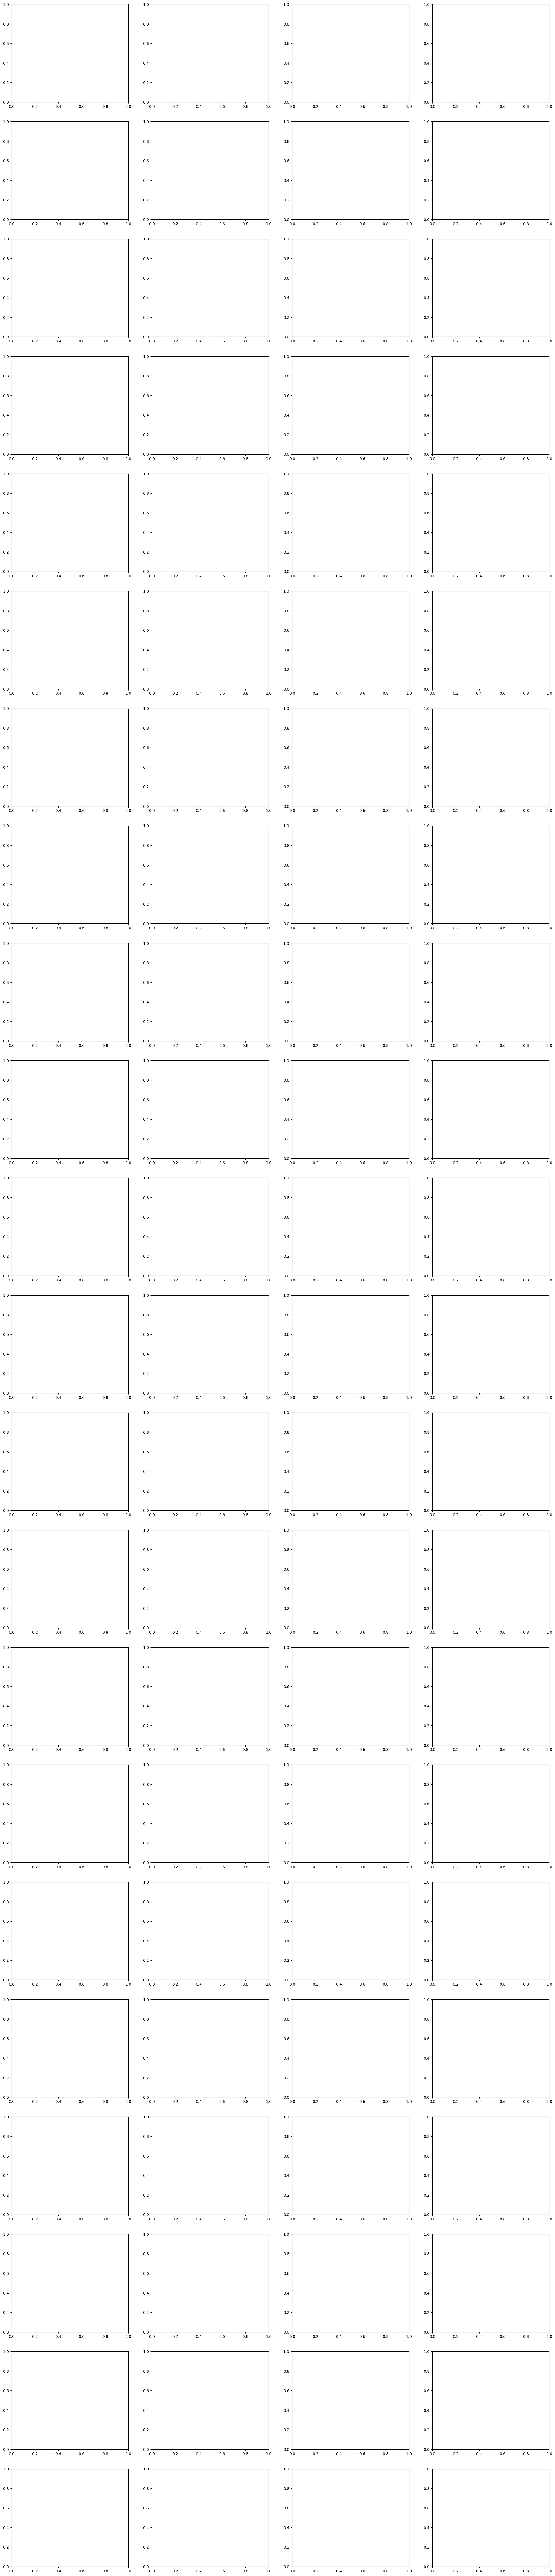

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dan mengganti nilai inf dengan NaN
train = pd.read_feather('C:/There/Stuff/Preset/train_data.ftr')
train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Mengambil baris terakhir dari setiap pelanggan
train = train.groupby(['customer_ID']).tail(1).set_index('customer_ID')

# Membuat plot KDE untuk variabel delinquency
def plot_kde(cols, plot_df, title):
    fig, axes = plt.subplots(22, 4, figsize=(25, 120))
    row = 0
    col = [i for i in range(0, 4)] * 22

    for i, column in enumerate(cols[:-1]):
        if (i != 0) and (i % 4 == 0):
            row += 1

        sns.kdeplot(
            x=column,
            hue="Target",
            hue_order=[1, 0],
            palette=["#933A16", "#6082B6"],
            label=["Default", "Paid"],
            data=plot_df[cols],
            fill=True,
            linewidth=2,
            legend=False,
            ax=axes[row, col[i]] if 22 > 1 else axes[i],
            warn_singular=False
        )

        if 22 > 1:
            axes[row, col[i]].tick_params(left=False, bottom=False)
            axes[row, col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=("Density" if i % 4 == 0 else ''))
        else:
            axes[i].tick_params(left=False, bottom=False)
            axes[i].set(title='\n\n{}'.format(column), xlabel='', ylabel=("Density" if i % 4 == 0 else ''))

    empty_plots = (4 * 22) - (len(list(plot_df[cols].columns)) - 1)

    for i in range(4 - empty_plots, 4):
        axes[22 - 1, i].set_visible(False)

    if 22 > 0:
        handles, _ = axes[0, 0].get_legend_handles_labels()
    else:
        handles, _ = axes[0].get_legend_handles_labels()

    fig.legend(labels=['Default', 'Paid'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 1))
    sns.despine(bottom=True, trim=True)
    plt.tight_layout(rect=[0, 0.2, 1, 0.99])
    fig.suptitle(title, fontsize=28, x=0.5, y=1, color="#7b6b59")
    plt.show()
    plt.close()

# Daftar kolom untuk plot KDE
cols = [col for col in train.columns if (col.startswith(('D', 'T'))) and (col not in cat_cols[:-1] + ["Spend 2"])]
plot_df = train[cols]

# Memanggil fungsi plot_kde untuk variabel delinquency
plot_kde(cols, plot_df, "Distribution of Delinquency Variables")


C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning:

overflow encountered in cast

C:\Users\MG GAMING PRO.DESKTOP-3QJQCSQ\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\

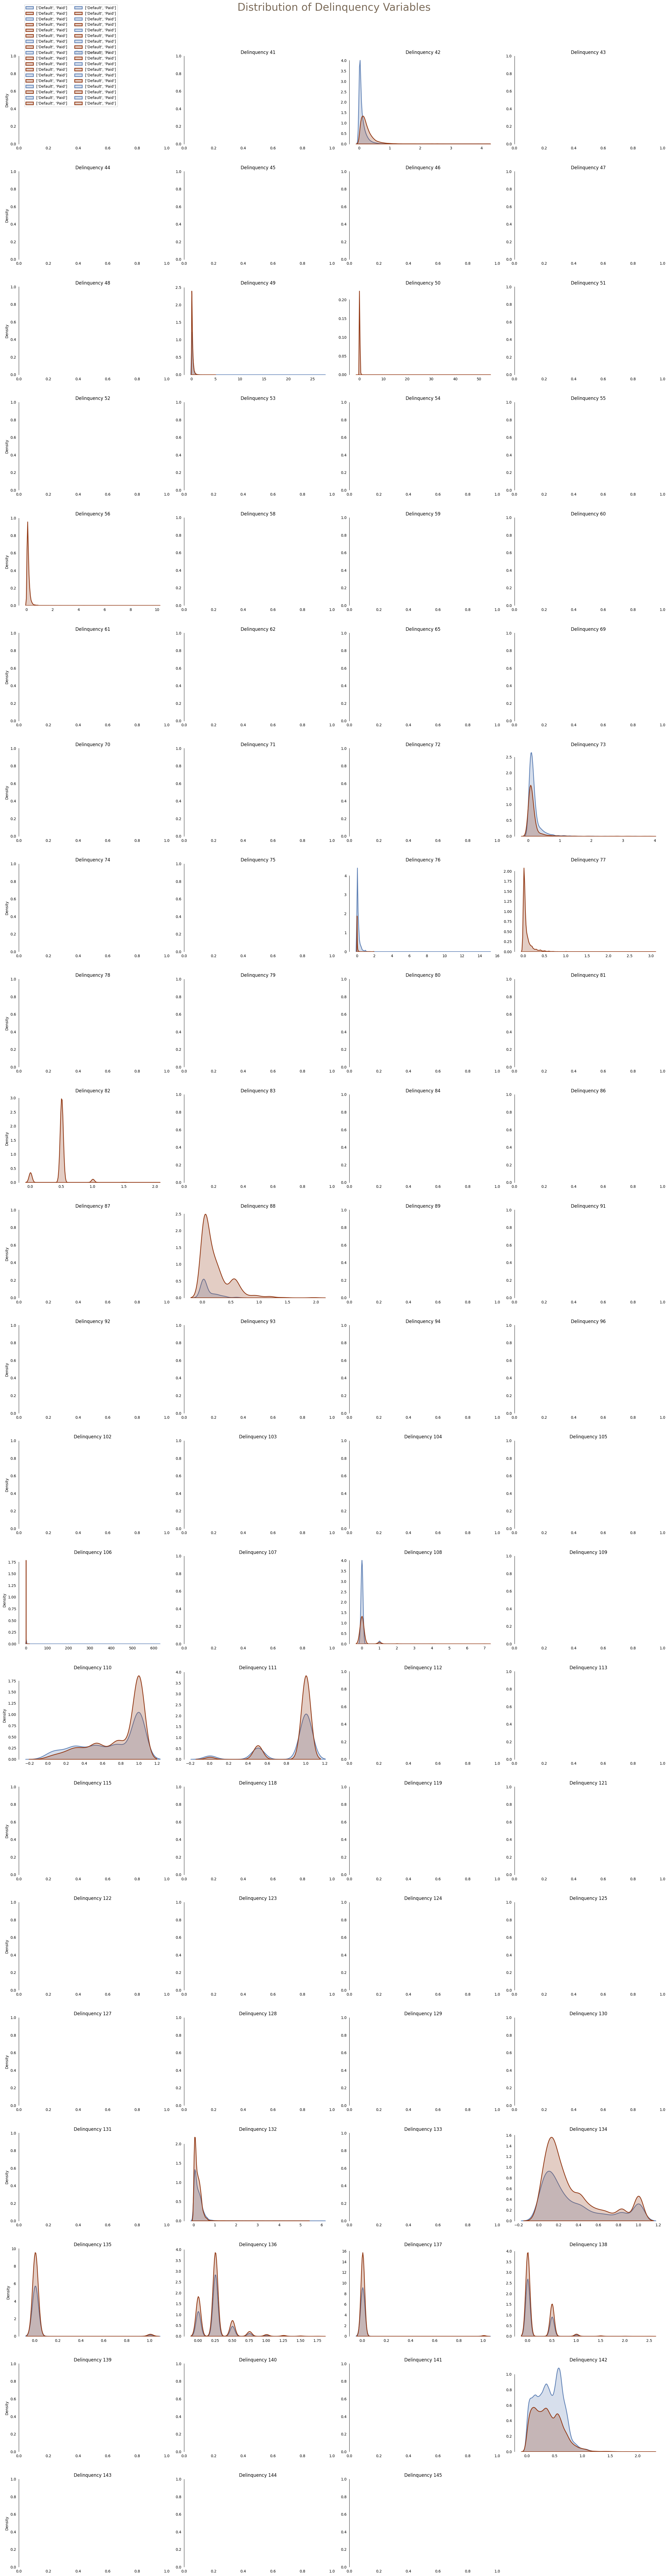

In [ ]:
cols=[col for col in train.columns if (col.startswith(('D','T'))) & (col not in cat_cols[:-1] + ["Spend 2"])]
plot_df=train[cols]
get_the_kde_plot(22, 4, (25, 120), cols, plot_df, "Distribution of Delinquency Variables", 28)